In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Turn Path into string
#Creating Path
path = r'/Users/gwynreniers/Documents/World Happiness Report'
path

'/Users/gwynreniers/Documents/World Happiness Report'

In [4]:
df = pd.read_csv(os.path.join(path,'world_happiness_clean.csv'),
                      index_col = False)
df.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
df.describe()

,Unnamed: 0,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,780.000000,782.000000
mean,77.703325,2016.993606,78.698210,5.372798,0.913315,1.079275,0.586902,0.423446,0.125732,0.217810
std,45.182532,1.417364,45.182384,1.128625,0.406203,0.330478,0.242978,0.157126,0.106139,0.123045
min,0.000000,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,2016.000000,40.000000,4.471000,0.606755,0.870333,0.405768,0.317532,0.054000,0.130000
50%,78.000000,2017.000000,79.000000,5.322500,0.978120,1.124735,0.635165,0.445297,0.092419,0.201119
75%,117.000000,2018.000000,118.000000,6.173000,1.229000,1.330000,0.774117,0.545470,0.155075,0.281000
max,157.000000,2019.000000,158.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.551910,0.838075


In [9]:
df.shape

(782, 11)

In [10]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [11]:
#find null values 
df.isnull().sum()

Unnamed: 0                       0
Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    2
Generosity                       0
dtype: int64

In [17]:
# drop all rows with any NaN values
df = df.dropna()
print(df)


     Unnamed: 0  Year                   Country  Happiness Rank  \
0             0  2015               Switzerland               1   
1             1  2015                   Iceland               2   
2             2  2015                   Denmark               3   
3             3  2015                    Norway               4   
4             4  2015                    Canada               5   
..          ...   ...                       ...             ...   
777         151  2019                     Yemen             152   
778         152  2019                  Tanzania             153   
779         153  2019               South Sudan             154   
780         154  2019  Central African Republic             155   
781         155  2019                   Burundi             156   

     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.5

In [18]:
df.isnull().sum()
#Null values dropped as it does not impact this exploration

Unnamed: 0                       0
Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [12]:
# Find duplicates

df_dups = df[df.duplicated()]

In [13]:
df_dups.shape # No duplicates!

(0, 11)

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     780 non-null    int64  
 1   Year                           780 non-null    int64  
 2   Country                        780 non-null    object 
 3   Happiness Rank                 780 non-null    int64  
 4   Happiness Score                780 non-null    float64
 5   Economy (GDP per Capita)       780 non-null    float64
 6   Family                         780 non-null    float64
 7   Health (Life Expectancy)       780 non-null    float64
 8   Freedom                        780 non-null    float64
 9   Trust (Government Corruption)  780 non-null    float64
 10  Generosity                     780 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 89.3+ KB


In [151]:
# a list with the countries of South America as found in https://www.countries-ofthe-world.com/countries-of-europe.html

countries_of_south_america =['Argentina'
,'Bolivia'
,'Brazil'
,'Chile'
,'Colombia'
,'Ecuador'
,'Guyana'
,'Paraguay'
,'Peru'
,'Suriname'
,'Uruguay'
,'Venezuela']

In [152]:
# Add a new column [Continent] and insert the value Europe for all the rows which the value of column [Contry or region] matches
# the value of the list countries_of_europe.

df['Continent'] = np.where(df['Country'].isin(countries_of_south_america), 'South America', 'another continent')

df

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Continent
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,another continent
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,another continent
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,another continent
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,another continent
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,another continent
...,...,...,...,...,...,...,...,...,...,...,...,...
777,151,2019,Yemen,152,3.355,0.44200,1.07300,0.34300,0.24400,0.06400,0.08300,another continent
778,152,2019,Tanzania,153,3.303,0.45500,0.99100,0.38100,0.48100,0.09700,0.27000,another continent
779,153,2019,South Sudan,154,3.254,0.33700,0.60800,0.17700,0.11200,0.10600,0.22400,another continent
780,154,2019,Central African Republic,155,3.083,0.02400,0.00000,0.01000,0.30500,0.03800,0.21800,another continent


In [153]:
# Create a correlation matrix using pandas

df.corr()

,Unnamed: 0,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Unnamed: 0,1.000000,-0.004338,0.999999,-0.992627,-0.795880,-0.644290,-0.761850,-0.538477,-0.376740,-0.127221
Year,-0.004338,1.000000,-0.004239,-0.004157,0.002373,0.373692,-0.016636,0.124277,-0.118157,-0.199911
Happiness Rank,0.999999,-0.004239,1.000000,-0.992622,-0.795913,-0.644219,-0.761882,-0.538388,-0.376700,-0.127222
Happiness Score,-0.992627,-0.004157,-0.992622,1.000000,0.791687,0.645661,0.759138,0.550748,0.403157,0.149163
Economy (GDP per Capita),-0.795880,0.002373,-0.795913,0.791687,1.000000,0.581719,0.815489,0.337946,0.311379,-0.000121
Family,-0.644290,0.373692,-0.644219,0.645661,0.581719,1.000000,0.538390,0.442156,0.132941,-0.031501
Health (Life Expectancy),-0.761850,-0.016636,-0.761882,0.759138,0.815489,0.538390,1.000000,0.359688,0.276114,0.047476
Freedom,-0.538477,0.124277,-0.538388,0.550748,0.337946,0.442156,0.359688,1.000000,0.450650,0.269208
Trust (Government Corruption),-0.376740,-0.118157,-0.376700,0.403157,0.311379,0.132941,0.276114,0.450650,1.000000,0.323794
Generosity,-0.127221,-0.199911,-0.127222,0.149163,-0.000121,-0.031501,0.047476,0.269208,0.323794,1.000000


In [154]:
sub = df[df["Continent"].isin(['South America'])]

In [155]:
sub

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Continent
15,15,2015,Brazil,16,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.145740,South America
22,22,2015,Venezuela,23,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.058410,South America
26,26,2015,Chile,27,6.670,1.107150,1.124470,0.858570,0.441320,0.128690,0.333630,South America
29,29,2015,Argentina,30,6.574,1.053510,1.248230,0.787230,0.449740,0.084840,0.114510,South America
31,31,2015,Uruguay,32,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400,South America
32,32,2015,Colombia,33,6.477,0.918610,1.240180,0.690770,0.534660,0.051200,0.184010,South America
39,39,2015,Suriname,40,6.269,0.995340,0.972000,0.608200,0.596570,0.136330,0.169910,South America
47,47,2015,Ecuador,48,5.975,0.864020,0.999030,0.790750,0.485740,0.180900,0.115410,South America
50,50,2015,Bolivia,51,5.890,0.681330,0.978410,0.539200,0.574140,0.088000,0.205360,South America
52,52,2015,Paraguay,53,5.878,0.759850,1.304770,0.660980,0.538990,0.082420,0.342400,South America


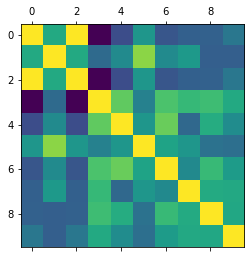

In [156]:
# Create a correlation heatmap using matplotlib
# Save figure
plt.matshow(sub.corr())
plt.savefig("Netcorr.png") 


Text(0.5, 1.0, 'Correlation Matrix South America')

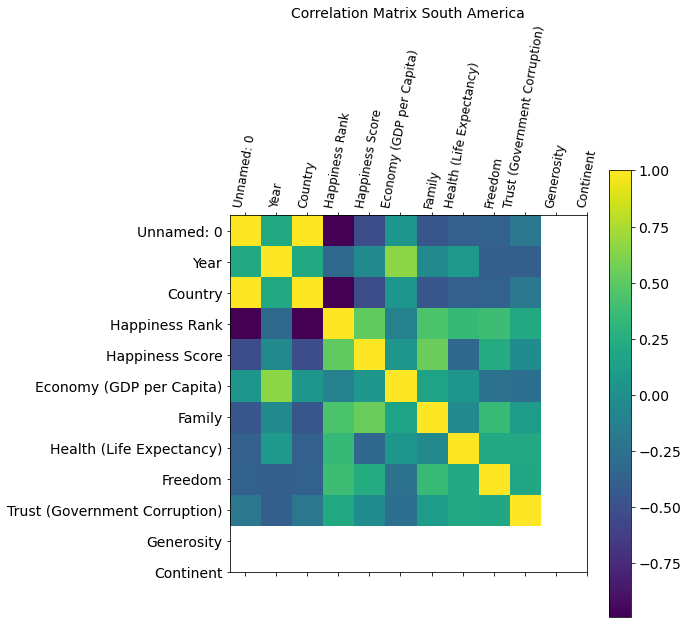

In [157]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=80) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix South America', fontsize=14) # add title

#### Looking at the heat map is shows there are some correlations in the variables- for instance family appears to be a significant part of happiness, and the GDP and government trust seem to have a negative correlation. There seems to be slight positive correlations in health and freedom in relation to happiness as well.

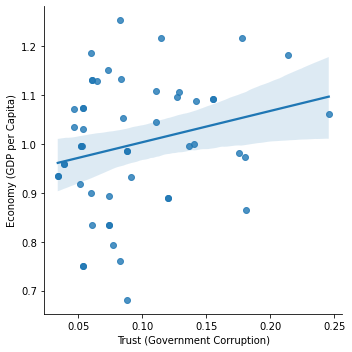

In [158]:
# Create a scatterplot for the "Economy (GDP per Capita)" and "Happiness Score" columns in seaborn

sns.lmplot(x = 'Trust (Government Corruption)', y = 'Economy (GDP per Capita)', data = sub)

#### This scatter plot shows that there is a slight positive correlation in the countries of South America with the Economy and Government trust, this is not what the heat map showed, so the correlation may not be accurate.

In [159]:
# Keep only the variables you want to use in the pair plot

sub2 = sub[['Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Trust (Government Corruption)']]

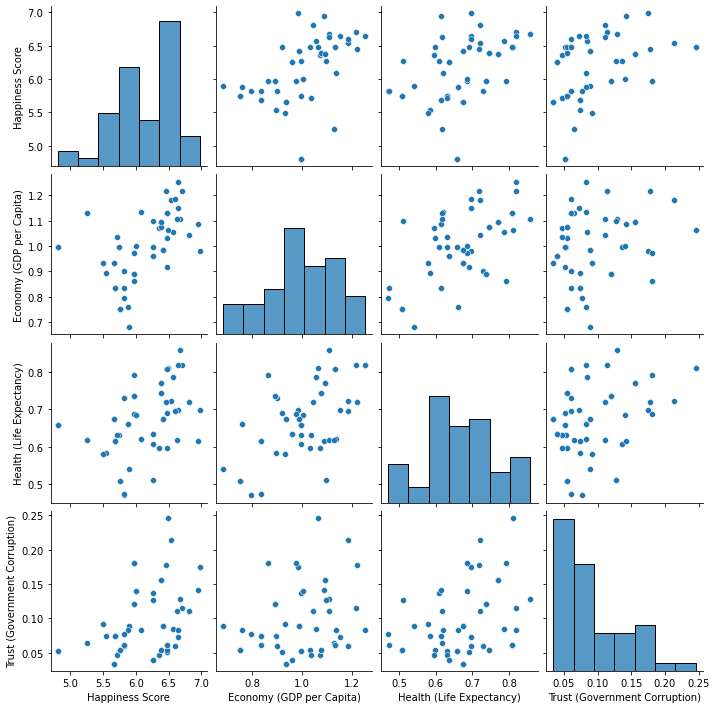

In [160]:
# Create a pair plot 

g = sns.pairplot(sub2)

### Categorical Plots

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

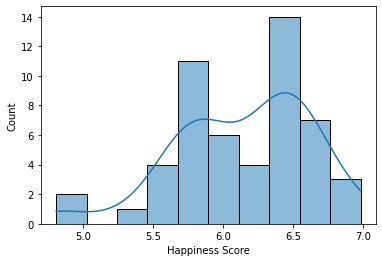

In [179]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(sub['Happiness Score'], bins = 10, kde = True)

In [180]:
sub3['Economy (GDP per Capita)'] = sub3['Economy (GDP per Capita)'].astype(float)

ValueError: could not convert string to float: 'Growth Economy'

In [237]:
# Create a subset excluding the columns

sub3 = sub[['Country','Year','Happiness Score','Happiness Rank',
            
            'Economy (GDP per Capita)','Health (Life Expectancy)','Family','Trust (Government Corruption)']]

In [238]:
sub3.round(2)

,Country,Year,Happiness Score,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Family,Trust (Government Corruption)
15,Brazil,2015,6.98,16,0.98,0.70,1.23,0.18
22,Venezuela,2015,6.81,23,1.04,0.72,1.26,0.11
26,Chile,2015,6.67,27,1.11,0.86,1.12,0.13
29,Argentina,2015,6.57,30,1.05,0.79,1.25,0.08
31,Uruguay,2015,6.48,32,1.06,0.81,1.21,0.25
32,Colombia,2015,6.48,33,0.92,0.69,1.24,0.05
39,Suriname,2015,6.27,40,1.00,0.61,0.97,0.14
47,Ecuador,2015,5.98,48,0.86,0.79,1.00,0.18
50,Bolivia,2015,5.89,51,0.68,0.54,0.98,0.09
52,Paraguay,2015,5.88,53,0.76,0.66,1.30,0.08


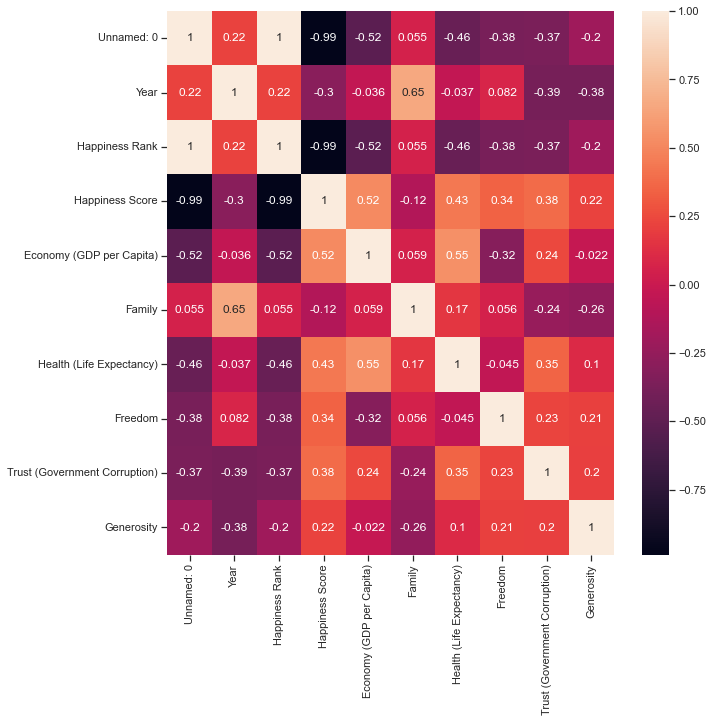

In [239]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [240]:
 sub3.groupby("Country").mean()

,Year,Happiness Score,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Family,Trust (Government Corruption)
Country,,,,,,,
Argentina,2017.0,6.5198,27.6,1.107235,0.733495,1.338160,0.065108
Bolivia,2017.0,5.8078,58.4,0.762261,0.499706,1.097964,0.066788
Brazil,2017.0,6.6816,22.2,1.029627,0.655544,1.330311,0.120793
Chile,2017.0,6.5958,24.2,1.167727,0.822576,1.195273,0.089498
Colombia,2017.0,6.3670,34.8,0.987910,0.630478,1.308411,0.045972
Ecuador,2017.0,5.9810,47.8,0.923180,0.726903,1.160988,0.148281
Paraguay,2017.0,5.6542,64.2,0.851223,0.610636,1.393433,0.079089
Peru,2017.0,5.7216,63.0,0.959887,0.667655,1.100782,0.045572
Suriname,2015.5,6.2690,40.0,1.046100,0.558765,0.875330,0.131625


#### 

In [251]:
sub3.loc[sub3['Happiness Score'] < 5.9, 'Happiness Rank'] = 'Low Happiness'

In [257]:
sub3.loc[(sub3['Happiness Score'] > 5.9) & (sub3['Happiness Score'] < 6.4), 'Happiness Rank'] = 'Fair Happiness'

In [262]:
sub3.loc[sub3['Happiness Score'] > 6.41, 'Happiness Rank'] = 'Higher Happiness'

In [263]:
sub3['Economy (GDP per Capita)'].value_counts(dropna = False)

0.996000    2
0.960000    2
0.986000    2
1.073000    2
1.093000    2
1.131000    2
0.889000    2
0.751000    2
0.835000    2
0.934000    2
1.044240    1
1.128431    1
0.932537    1
1.035225    1
0.833757    1
1.000820    1
1.070622    1
1.217560    1
1.185295    1
1.107353    1
1.252785    1
0.981240    1
0.996020    1
0.794220    1
1.107150    1
1.053510    1
1.061660    1
0.918610    1
0.995340    1
0.864020    1
0.681330    1
0.759850    1
0.900190    1
1.087540    1
1.216700    1
1.151370    1
1.181570    1
1.030320    1
1.096860    1
1.133670    1
0.973060    1
0.893730    1
Name: Economy (GDP per Capita), dtype: int64

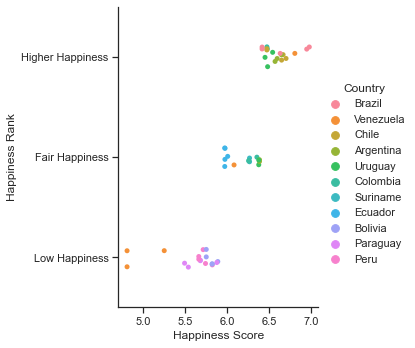

In [267]:
# Create a categorical plot in seaborn using the economic categories created above

sns.set(style="ticks")
g = sns.catplot(x="Happiness Score", y="Happiness Rank", hue="Country", data=sub3)

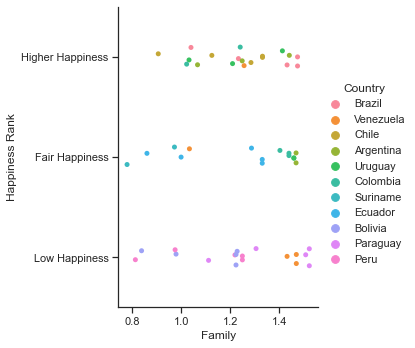

In [274]:
sns.set(style="ticks")
g = sns.catplot(x="Family", y="Happiness Rank", hue="Country", data=sub3)

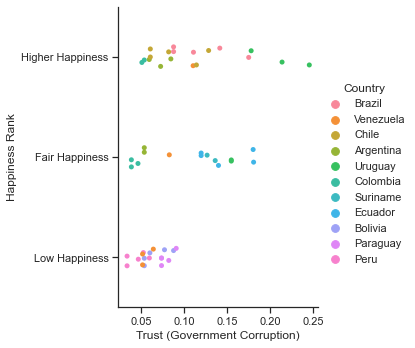

In [275]:
sns.set(style="ticks")
g = sns.catplot(x="Trust (Government Corruption)", y="Happiness Rank", hue="Country", data=sub3)

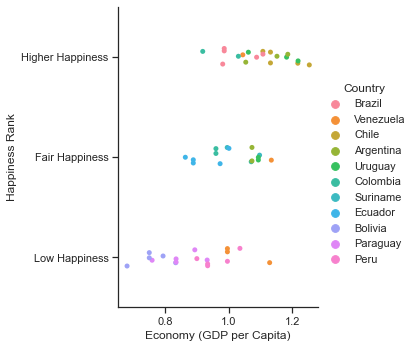

In [276]:
sns.set(style="ticks")
g = sns.catplot(x="Economy (GDP per Capita)", y="Happiness Rank", hue="Country", data=sub3)

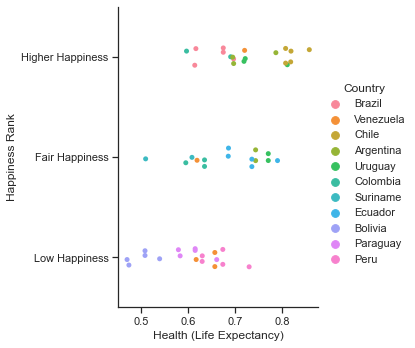

In [278]:
sns.set(style="ticks")
g = sns.catplot(x="Health (Life Expectancy)", y="Happiness Rank", hue="Country", data=sub3)

In [279]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

#### It appears by these catagorical plots that Ecuador falls pretty much in the middle for its level of happiness compared to other Countries in South America. This is considering the scores over the last 5 years, and looking at the variables of: Trust in government, Health, Country GDP and Family.  Family and Health variables had the highest scores over the years.

